<a href="https://colab.research.google.com/github/AminaZahid/Chatgpt-Sentiment-Analysis-using-ML/blob/main/ChatGPT_Sentiment_Analysis_(ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/content/drive/MyDrive/twitter-sentiment-analysis.csv")
df.head()

,Unnamed: 0,tweets,labels
0,0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,1,"Try talking with ChatGPT, our new AI system wh...",good
2,2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,3,"THRILLED to share that ChatGPT, our new model ...",good
4,4,"As of 2 minutes ago, @OpenAI released their ne...",bad


In [3]:
df = df[['tweets', 'labels']]
df.head()

,tweets,labels
0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,"Try talking with ChatGPT, our new AI system wh...",good
2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,"THRILLED to share that ChatGPT, our new model ...",good
4,"As of 2 minutes ago, @OpenAI released their ne...",bad


In [4]:
data=df.copy()

In [5]:
import matplotlib.pyplot as plt

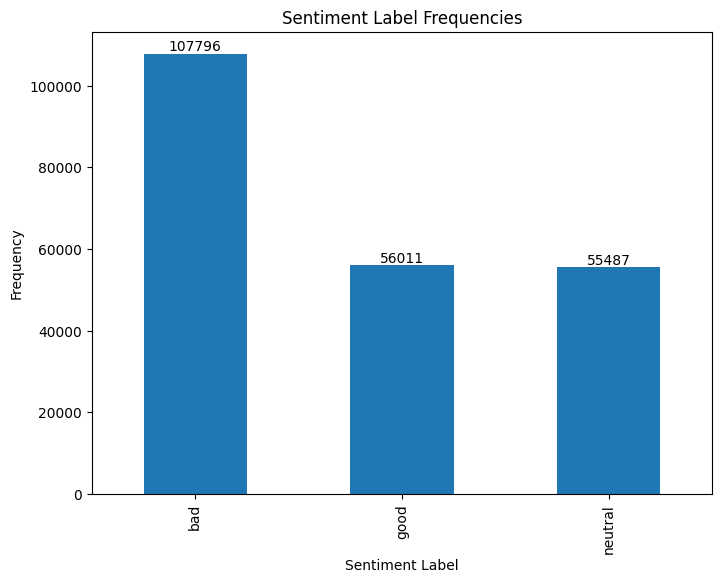

In [6]:
# count the frequency of each sentiment label
sentiment_counts = df.labels.value_counts()

# create a column plot
fig, ax = plt.subplots(figsize=(8,6))
sentiment_counts.plot(kind='bar', ax=ax)

# set the plot title and axis labels
ax.set_title('Sentiment Label Frequencies')
ax.set_xlabel('Sentiment Label')
ax.set_ylabel('Frequency')

# add data labels to the top of each column
for i, freq in enumerate(sentiment_counts):
    ax.text(i, freq, str(freq), ha='center', va='bottom')

# display the plot
plt.show()

In [7]:
for i in df.tweets.head(10):
    print(i)
    print()

ChatGPT: Optimizing Language Models for Dialogue https://t.co/K9rKRygYyn @OpenAI

Try talking with ChatGPT, our new AI system which is optimized for dialogue. Your feedback will help us improve it. https://t.co/sHDm57g3Kr

ChatGPT: Optimizing Language Models for Dialogue https://t.co/GLEbMoKN6w #AI #MachineLearning #DataScience #ArtificialIntelligence\n\nTrending AI/ML Article Identified &amp; Digested via Granola; a Machine-Driven RSS Bot by Ramsey Elbasheer https://t.co/RprmAXUp34

THRILLED to share that ChatGPT, our new model optimized for dialog, is now public, free, and accessible to everyone. https://t.co/dyvtHecYbd https://t.co/DdhzhqhCBX https://t.co/l8qTLure71

As of 2 minutes ago, @OpenAI released their new ChatGPT. \n\nAnd you can use it right now 👇 https://t.co/VyPGPNw988 https://t.co/cSn5h6h1M1

Just launched ChatGPT, our new AI system which is optimized for dialogue: https://t.co/ArX6m0FfLE.\n\nTry it out here: https://t.co/YM1gp5bA64

As of 2 minutes ago, @OpenAI release

In [8]:
# Remove all the tweet links since they all begin with https:

df['tweet_list'] = df['tweets'].str.split('https:')
df.head()

,tweets,labels,tweet_list
0,ChatGPT: Optimizing Language Models for Dialog...,neutral,[ChatGPT: Optimizing Language Models for Dialo...
1,"Try talking with ChatGPT, our new AI system wh...",good,"[Try talking with ChatGPT, our new AI system w..."
2,ChatGPT: Optimizing Language Models for Dialog...,neutral,[ChatGPT: Optimizing Language Models for Dialo...
3,"THRILLED to share that ChatGPT, our new model ...",good,"[THRILLED to share that ChatGPT, our new model..."
4,"As of 2 minutes ago, @OpenAI released their ne...",bad,"[As of 2 minutes ago, @OpenAI released their n..."


In [9]:
# Select the text part of the list

text = [i[0] for i in df.tweet_list]
df['text'] = text
df = df[['text', 'labels']]
df.head()

,text,labels
0,ChatGPT: Optimizing Language Models for Dialogue,neutral
1,"Try talking with ChatGPT, our new AI system wh...",good
2,ChatGPT: Optimizing Language Models for Dialogue,neutral
3,"THRILLED to share that ChatGPT, our new model ...",good
4,"As of 2 minutes ago, @OpenAI released their ne...",bad


In [10]:
# Import re for string processing

import re

In [11]:
# Remove all non-alphanumeric characters from the text list

string = r'[A-Za-z0-9 ]'

trim_list=[]

for row in text:
    s=''
    for letter in row:
        if bool(re.match(string, letter)):
            s+=letter
    trim_list.append(s)

In [12]:
# Remove the non-printing characters from text

rep_list = ['\U0001fae1', '\\n', '@', '#', '\xa0', '***']

for i in trim_list:
    for j in rep_list:
        if j in i:
            i.replace(j,'')

In [13]:
df['text'] = trim_list
df.head()

,text,labels
0,ChatGPT Optimizing Language Models for Dialogue,neutral
1,Try talking with ChatGPT our new AI system whi...,good
2,ChatGPT Optimizing Language Models for Dialogue,neutral
3,THRILLED to share that ChatGPT our new model o...,good
4,As of 2 minutes ago OpenAI released their new ...,bad


In [14]:
pip install wordcloud

In [15]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image

In [16]:
# Map the labels to integers
# 1 for good tweet
# 0 for neutral tweet
# -1 for bad tweet

df['lab_int'] = np.where(df['labels']=='good', 1, np.where(df['labels']=='bad', -1, 0))

In [17]:
# Import sci-kit learn models for classification

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import jaccard_score, accuracy_score, f1_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['lab_int'], test_size=0.3, random_state=1)
vec = CountVectorizer(
    ngram_range=(1, 3),
    stop_words="english",
)

X_train = vec.fit_transform(X_train)
X_test = vec.transform(X_test)

In [19]:
from sklearn.naive_bayes import MultinomialNB

In [20]:
# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)

preds = nb.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          -1       0.76      0.93      0.83     32288
           0       0.72      0.29      0.41     16710
           1       0.66      0.77      0.71     16791

    accuracy                           0.72     65789
   macro avg       0.71      0.66      0.65     65789
weighted avg       0.72      0.72      0.69     65789



In [21]:
# Logistic Regression

log = LogisticRegression()
log.fit(X_train, y_train)

preds = log.predict(X_test)
print(classification_report(y_test, preds))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

          -1       0.86      0.94      0.90     32288
           0       0.74      0.65      0.69     16710
           1       0.83      0.79      0.81     16791

    accuracy                           0.83     65789
   macro avg       0.81      0.79      0.80     65789
weighted avg       0.82      0.83      0.83     65789

